In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#input height and weight
height= [[4.0], [4.5], [5.0], [5.2], [5.4], [5.8], [6.1], [6.2], [6.4], [6.8]]
weight= [ 42, 44, 49, 55, 53, 58, 60, 64, 66, 69 ]

In [20]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''
H_data = np.array(height)
W_data = np.array(weight)
print(H_data,W_data)
H_train, H_test, W_train, W_test = train_test_split( H_data, W_data, test_size = 0.3 )
print( H_train.shape, W_train.shape )
print( H_test.shape, W_test.shape )

[[4. ]
 [4.5]
 [5. ]
 [5.2]
 [5.4]
 [5.8]
 [6.1]
 [6.2]
 [6.4]
 [6.8]] [42 44 49 55 53 58 60 64 66 69]
(7, 1) (7,)
(3, 1) (3,)


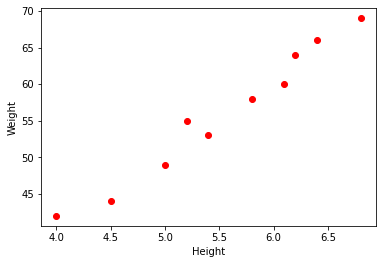

In [21]:
plt.scatter( H_data,W_data,color = 'red' )
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [22]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(H_train, W_train)

In [23]:
#get linear regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : 9.769281476598552, Intercept : 2.275543836519425


In [24]:
#Scores predicted = slope(m) * x(hours) + b(intercept)......(Training)
predicted_scores_on_training_data = np.zeros(H_train.shape)
#print(H_train)
for i in range(len(H_train)):
    predicted_scores_on_training_data[i] = (slope * H_train[i]  + intercept)
print("List : {}".format(predicted_scores_on_training_data))

List : [[64.79894529]
 [62.84508899]
 [41.35266974]
 [61.86816084]
 [53.07580751]
 [58.9373764 ]
 [51.12195122]]


[64.79894529 62.84508899 41.35266974 61.86816084 53.07580751 58.9373764
 51.12195122]


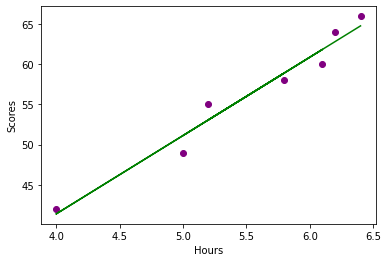

In [25]:
a1 = reg.predict(H_train)
print(a1)
plt.scatter(H_train, W_train, color = 'purple')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(H_train,predicted_scores_on_training_data, color = 'green')
plt.show()


In [26]:
#Scores predicted = slope(m) * x(height) + b(intercept)......(Testing)
predicted_scores_on_testing_data = np.zeros(H_test.shape)
for i in range(len((H_test))):
    predicted_scores_on_testing_data[i] = (slope * H_test[i] + intercept)
print("predicted testing data : {}".format(predicted_scores_on_testing_data))

predicted testing data : [[46.23731048]
 [55.02966381]
 [68.70665788]]


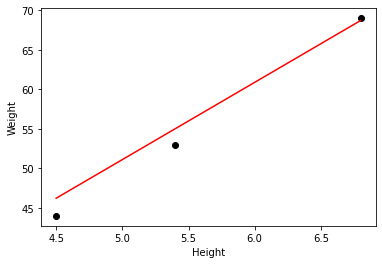

In [27]:
plt.scatter(H_test,W_test,color = 'black')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(H_test,predicted_scores_on_testing_data, color = 'red')
plt.show()

In [28]:
a = reg.score(H_test,W_test)
b = reg.score(H_train,W_train)
print("Testing data : {},Training data : {}".format(a,b))

Testing data : 0.9712750219153372,Training data : 0.9632784529819729


In [36]:
polynomial_equation = PolynomialFeatures(degree = 10)
input_H_train = polynomial_equation.fit_transform(H_train)
#print(polynomial_equation)
print("Input of Training data : {}".format(input_H_train))

input_H_test = polynomial_equation.fit_transform(H_test)
print("Input of testing data : {}".format(input_H_test))

Input of Training data : [[1.00000000e+00 6.40000000e+00 4.09600000e+01 2.62144000e+02
  1.67772160e+03 1.07374182e+04 6.87194767e+04 4.39804651e+05
  2.81474977e+06 1.80143985e+07 1.15292150e+08]
 [1.00000000e+00 6.20000000e+00 3.84400000e+01 2.38328000e+02
  1.47763360e+03 9.16132832e+03 5.68002356e+04 3.52161461e+05
  2.18340106e+06 1.35370865e+07 8.39299366e+07]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03 1.63840000e+04
  6.55360000e+04 2.62144000e+05 1.04857600e+06]
 [1.00000000e+00 6.10000000e+00 3.72100000e+01 2.26981000e+02
  1.38458410e+03 8.44596301e+03 5.15203744e+04 3.14274284e+05
  1.91707313e+06 1.16941461e+07 7.13342912e+07]
 [1.00000000e+00 5.20000000e+00 2.70400000e+01 1.40608000e+02
  7.31161600e+02 3.80204032e+03 1.97706097e+04 1.02807170e+05
  5.34597285e+05 2.77990588e+06 1.44555106e+07]
 [1.00000000e+00 5.80000000e+00 3.36400000e+01 1.95112000e+02
  1.13164960e+03 6.56356768e+03 3.80686925e+04 2.2079

In [37]:
#print(polynomial_equation.get_feature_names)
model_train = reg.fit(input_H_train,W_train)
model_test = reg.fit(input_H_test,W_test)

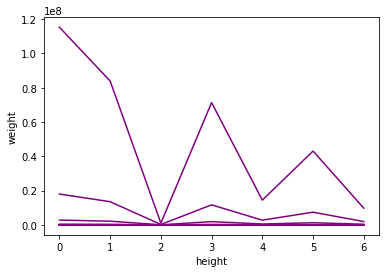

(7, 11) (7,)
(3, 11)


In [43]:
plt.plot(input_H_train , color = 'purple')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()
print(input_H_train.shape,W_train.shape)
print(input_H_test.shape)